In [1]:
import sys
sys.path.append('/Users/alex/Documents/OpenPIV/openpiv-python')


import openpiv.tools
import openpiv.process
import openpiv.scaling

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


/Users/alex/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/skimage/filter/__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


In [2]:
frame_a  = openpiv.tools.imread( '/Users/alex/Downloads/Movie1_Scene1_Import VIDEO_079.png' )
frame_b  = openpiv.tools.imread( '/Users/alex/Downloads/Movie1_Scene1_Import VIDEO_080.png' )

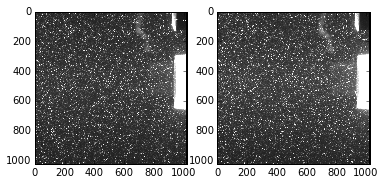

In [3]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(frame_a,cmap=plt.cm.gray)
ax[1].imshow(frame_b,cmap=plt.cm.gray)


In [4]:
winsize = 32 # pixels
searchsize = 64  # pixels, search in image B
overlap = 16 # pixels
dt = 1./30. # sec


u0, v0, sig2noise = openpiv.process.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), window_size=winsize, overlap=overlap, dt=dt, search_area_size=searchsize, sig2noise_method='peak2peak' )

In [5]:
x, y = openpiv.process.get_coordinates( image_size=frame_a.shape, window_size=winsize, overlap=overlap )

In [6]:
u1, v1, mask = openpiv.validation.sig2noise_val( u0, v0, sig2noise, threshold = 1.3 )

In [7]:
u2, v2 = openpiv.filters.replace_outliers( u1, v1, method='localmean', max_iter=10, kernel_size=2)

In [8]:
x, y, u3, v3 = openpiv.scaling.uniform(x, y, u2, v2, scaling_factor = 5.9039*30 )

In [9]:
openpiv.tools.save(x, y, u3, v3, mask, '/Users/alex/Downloads/Movie1_Scene1_Import VIDEO_080.txt' )

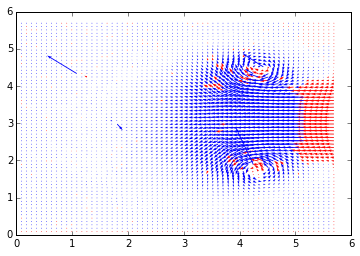

In [10]:
openpiv.tools.display_vector_field('/Users/alex/Downloads/Movie1_Scene1_Import VIDEO_080.txt', scale=50, width=0.0025)

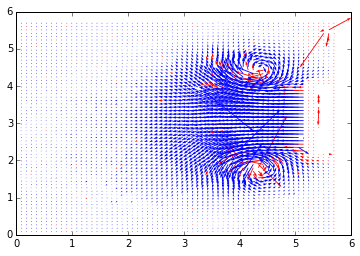

In [22]:
u0d, v0d =  openpiv.pyprocess.piv(frame_a, frame_b, window_size=winsize, overlap=overlap, dt=dt, corr_method='fft', subpixel_method='gaussian', sig2noise_method=None, nfftx=None, nffty=None, width=2)
openpiv.tools.save(x, y, u0d, v0d, mask, 'tmp.txt' )
openpiv.tools.display_vector_field('tmp.txt', scale=5000, width=0.0025)

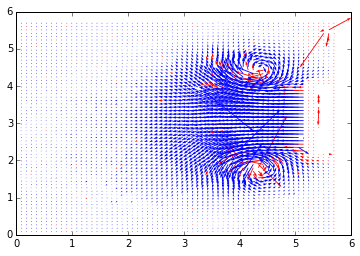

In [23]:
u1d, v1d =  openpiv.pyprocess.piv(frame_a, frame_b, window_size=winsize, overlap=overlap, dt=dt, corr_method='direct', subpixel_method='gaussian', sig2noise_method=None, nfftx=None, nffty=None, width=2)
openpiv.tools.save(x, y, u1d, v1d, mask, 'tmpdirect.txt' )
openpiv.tools.display_vector_field('tmpdirect.txt', scale=5000, width=0.0025)